In [17]:
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt

In [18]:
count = 0
total = 0
temp = []

output_dir = Path("/home/studyztp/test_ground/experiments/cpu-speed-diff/output")

finished_configs = {}

# check which arm experiment finished

for thread in ["1", "4"]:
    data_dir = Path(output_dir/f"{thread}-thread")
    for config in data_dir.iterdir():
        total += 1
        terminal_output_file = Path(config/"board.terminal")
        finished = False
        with open(terminal_output_file.as_posix()) as file:
            line = file.readline()
            while line:
                if "Verification    =" in line:
                    line = line.split()
                    count += 1
                    if line[2]!="SUCCESSFUL":
                        print(config.name)
                        print(line[2])
                    finished = True
                    break
                line = file.readline()
        if finished:
            # finished_configs.append(config.name)
            stats_file_path = Path(config/"stats.txt")
            with open(stats_file_path.as_posix()) as file:
                line = file.readline()
                while line:
                    if "hostSeconds" in line:
                        line = line.split()
                        time = float(line[1])
                    if "simInsts" in line:
                        line = line.split()
                        sim_insts = int(line[1])
                    line = file.readline()
            finished_configs[config.name] = {}
            finished_configs[config.name]["time"] = time
            name = (config.name).split('-')
            cpu_type = name[0]
            thread_num = name[1]
            bench = name[2]
            finished_configs[config.name]["bench"] = bench
            finished_configs[config.name]["cpu_type"] = cpu_type
            finished_configs[config.name]["thread_num"] = thread_num
            finished_configs[config.name]["sim_insts"] = sim_insts

        # else:
            # print("haven't done")
            # print(config.name)

print(f"{count} finished\n")
print(f"{total} total")


44 finished

56 total


In [19]:
pprint(finished_configs)

{'O3-1-cg': {'bench': 'cg',
             'cpu_type': 'O3',
             'sim_insts': 6179257605,
             'thread_num': '1',
             'time': 54700.03},
 'O3-1-ep': {'bench': 'ep',
             'cpu_type': 'O3',
             'sim_insts': 22096111311,
             'thread_num': '1',
             'time': 149551.23},
 'O3-1-ft': {'bench': 'ft',
             'cpu_type': 'O3',
             'sim_insts': 16241051775,
             'thread_num': '1',
             'time': 149195.59},
 'O3-1-is': {'bench': 'is',
             'cpu_type': 'O3',
             'sim_insts': 2643242762,
             'thread_num': '1',
             'time': 31384.47},
 'O3-1-mg': {'bench': 'mg',
             'cpu_type': 'O3',
             'sim_insts': 6106647509,
             'thread_num': '1',
             'time': 58483.84},
 'O3-4-cg': {'bench': 'cg',
             'cpu_type': 'O3',
             'sim_insts': 6232066445,
             'thread_num': '4',
             'time': 110900.74},
 'O3-4-ep': {'bench': 'ep',
 

In [20]:
graphs = {}

for config, data in finished_configs.items():
    bench = data["bench"]
    thread = data["thread_num"]
    cpu_type = data["cpu_type"]
    time = data["time"]
    sim_insts = data["sim_insts"]
    if thread not in graphs.keys():
        graphs[thread] = {}
    if bench not in graphs[thread].keys():
        graphs[thread][bench] = {}
    if "cpu_type" not in graphs[thread][bench].keys():
        graphs[thread][bench]["cpu_type"] = []
    if "time" not in graphs[thread][bench].keys():
        graphs[thread][bench]["time"] = []
    if "sim_insts" not in graphs[thread][bench].keys():
        graphs[thread][bench]["sim_insts"] = []
    graphs[thread][bench]["cpu_type"].append(cpu_type)
    graphs[thread][bench]["time"].append(time)
    graphs[thread][bench]["sim_insts"].append(sim_insts)

for data in graphs.values():
    for bench_data in data.values():
        cpu_type_list = bench_data["cpu_type"]
        time_list =  bench_data["time"]
        sim_insts_list = bench_data["sim_insts"]
        sorted_time_list = [x for _,x in sorted(zip(cpu_type_list,time_list))]
        sorted_sim_insts_list = [x for _,x in sorted(zip(cpu_type_list,sim_insts_list))]
        sorted_cpu_type_list = sorted(cpu_type_list)
        bench_data["cpu_type"] = sorted_cpu_type_list
        bench_data["time"] = sorted_time_list
        bench_data["sim_insts"] = sorted_sim_insts_list


In [21]:
pprint(graphs)

{'1': {'cg': {'cpu_type': ['O3', 'atomic', 'minor', 'timing'],
              'sim_insts': [6179257605, 5969677357, 6233164872, 6938643899],
              'time': [54700.03, 7996.83, 34586.27, 27543.62]},
       'ep': {'cpu_type': ['O3', 'atomic', 'minor', 'timing'],
              'sim_insts': [22096111311, 21718078733, 22189237360, 23578840142],
              'time': [149551.23, 28968.82, 106793.95, 80289.68]},
       'ft': {'cpu_type': ['O3', 'atomic', 'minor', 'timing'],
              'sim_insts': [16241051775, 15937933752, 16334550449, 17619863562],
              'time': [149195.59, 25610.92, 92990.56, 72371.26]},
       'is': {'cpu_type': ['O3', 'atomic', 'minor', 'timing'],
              'sim_insts': [2643242762, 2434193768, 2643744032, 2772597540],
              'time': [31384.47, 2857.32, 13517.23, 10462.45]},
       'lu': {'cpu_type': ['atomic'],
              'sim_insts': [113153065305],
              'time': [207298.87]},
       'mg': {'cpu_type': ['O3', 'atomic', 'minor', 't

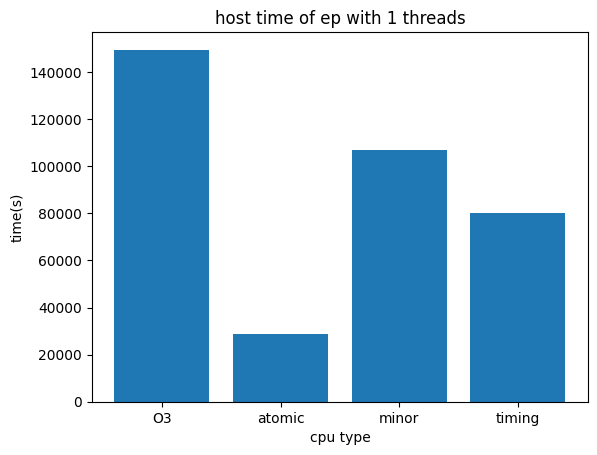

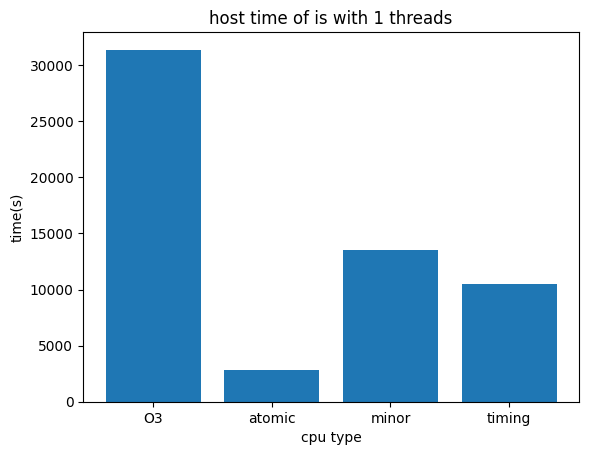

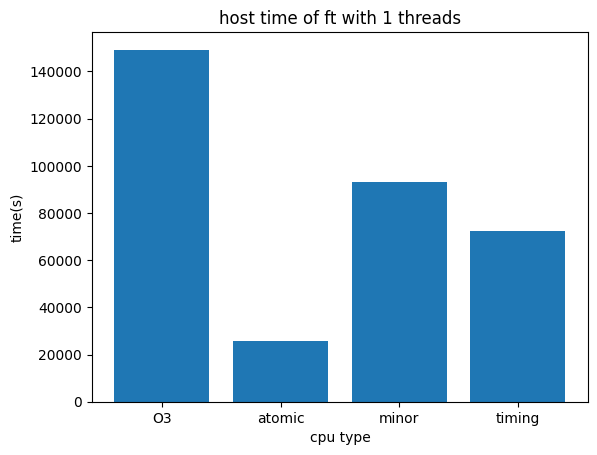

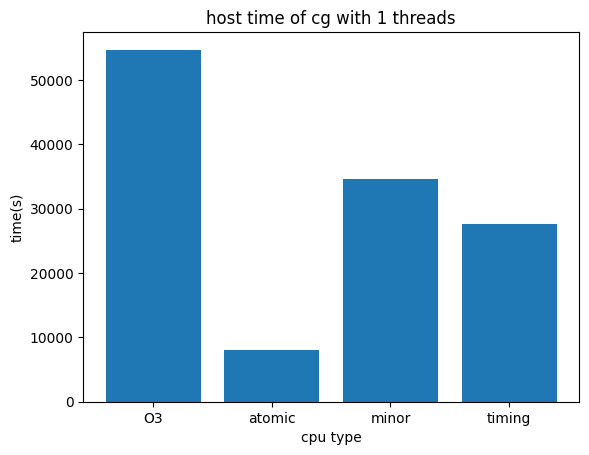

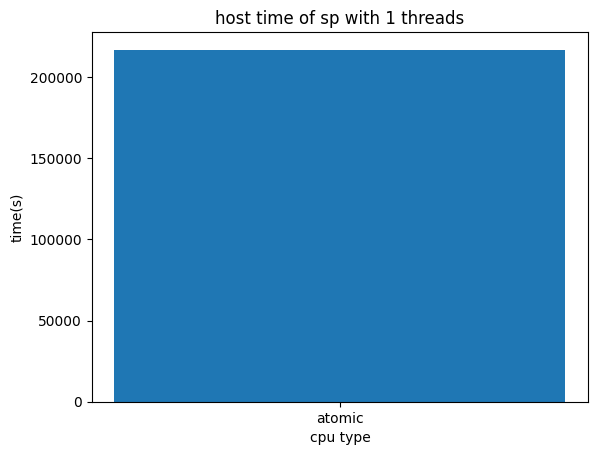

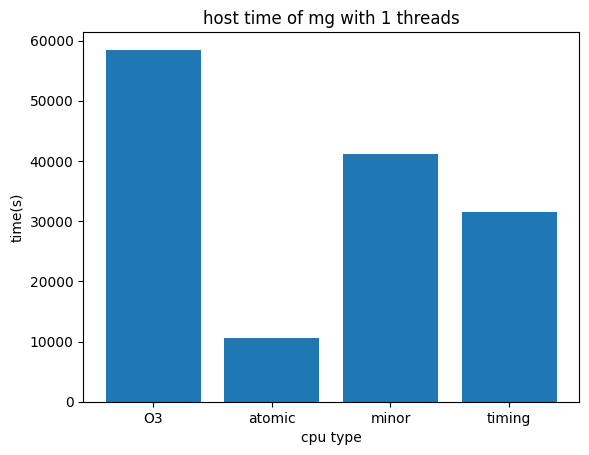

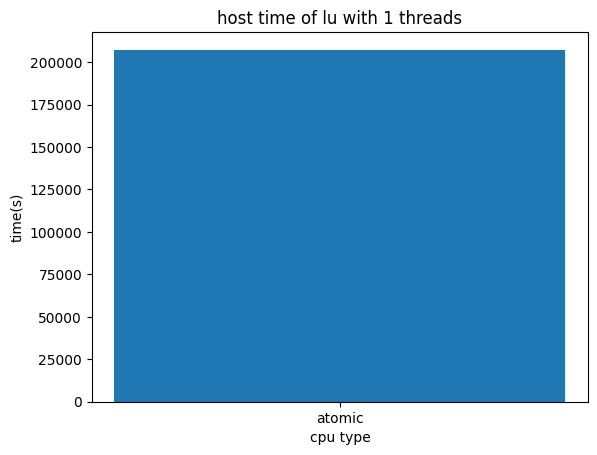

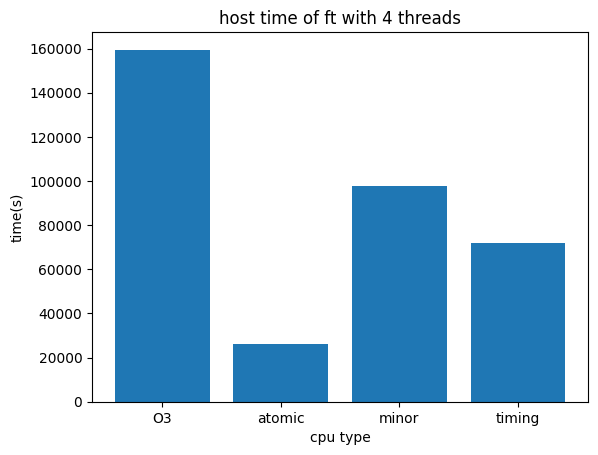

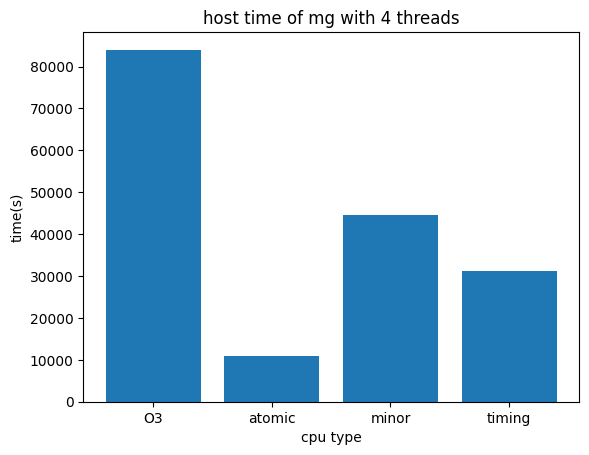

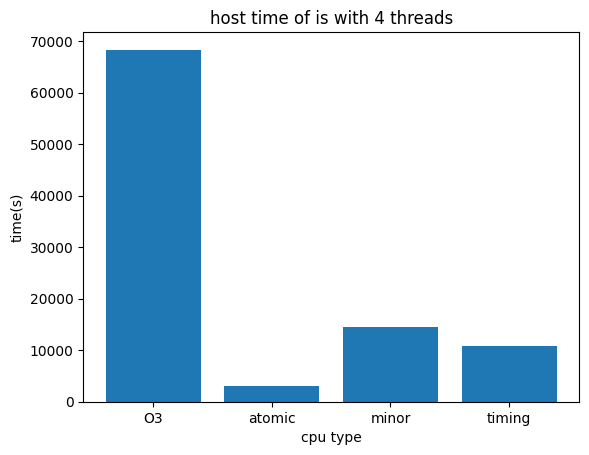

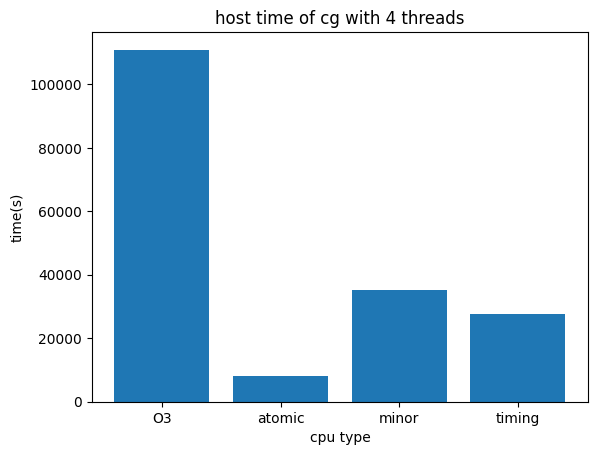

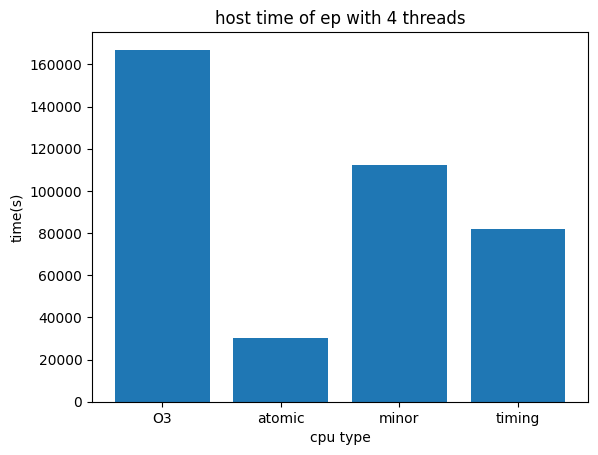

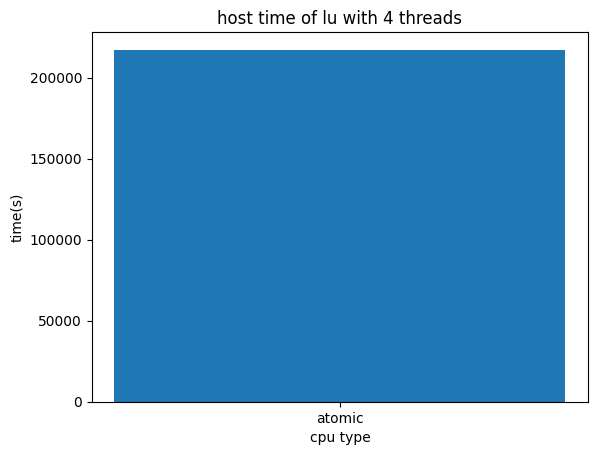

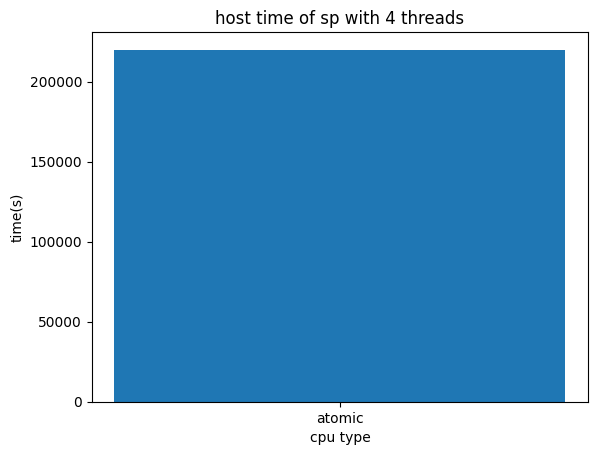

In [22]:
for thread_num, thread_data in graphs.items():
    for bench, bench_data in thread_data.items():
        fig, ax = plt.subplots()
        ax.bar(bench_data["cpu_type"],bench_data["time"])

        ax.set_ylabel("time(s)")
        ax.set_xlabel("cpu type")

        ax.set_title(f"host time of {bench} with {thread_num} threads")

        plt.show()

        

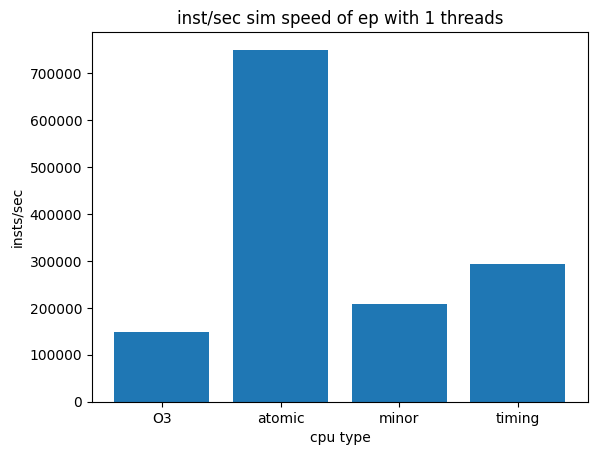

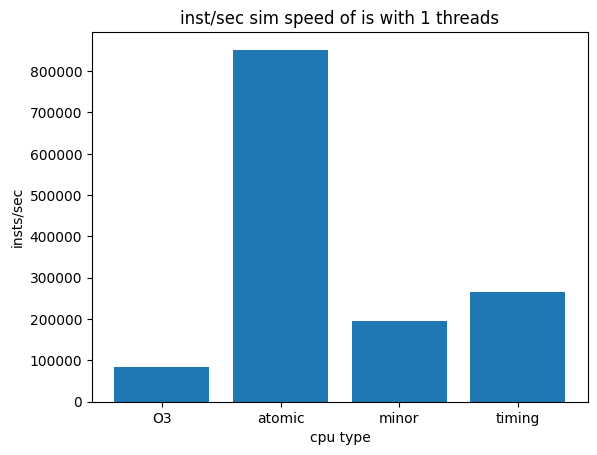

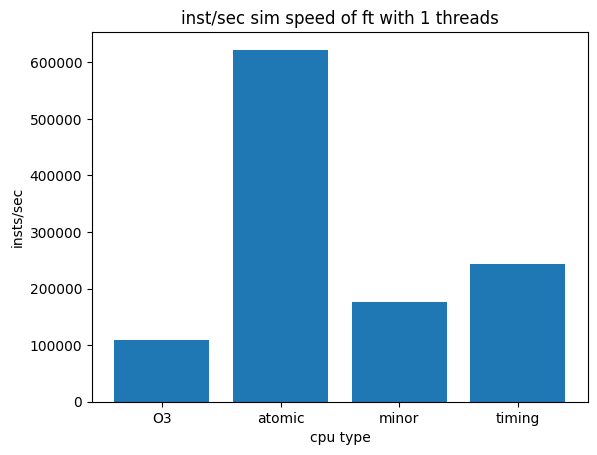

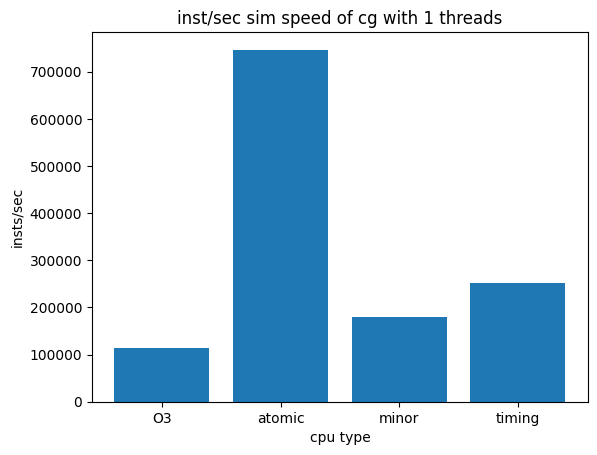

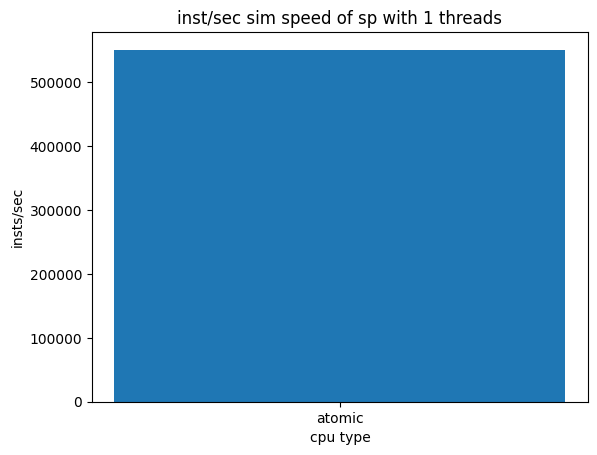

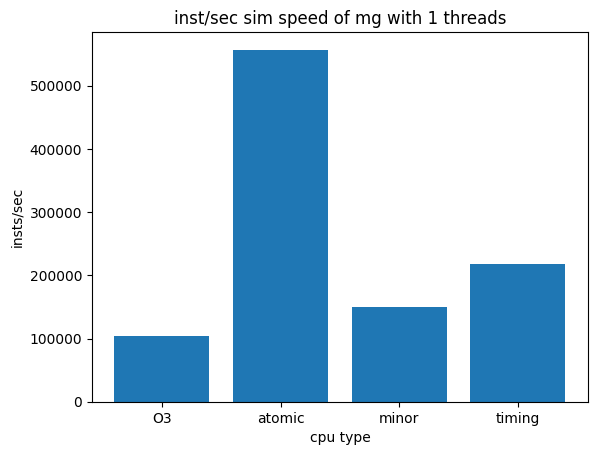

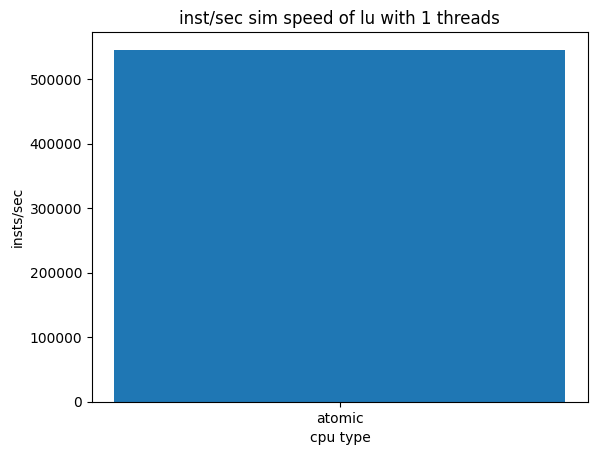

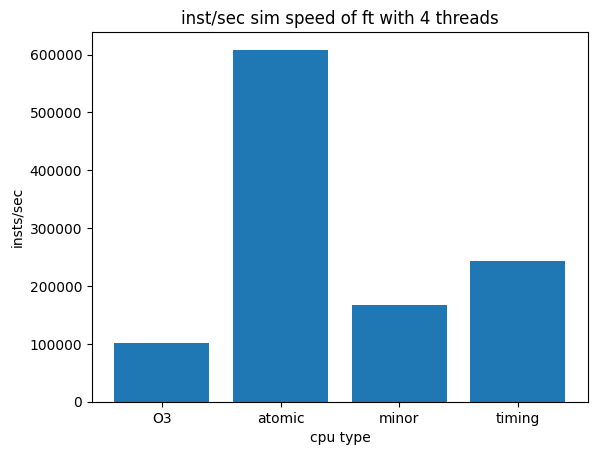

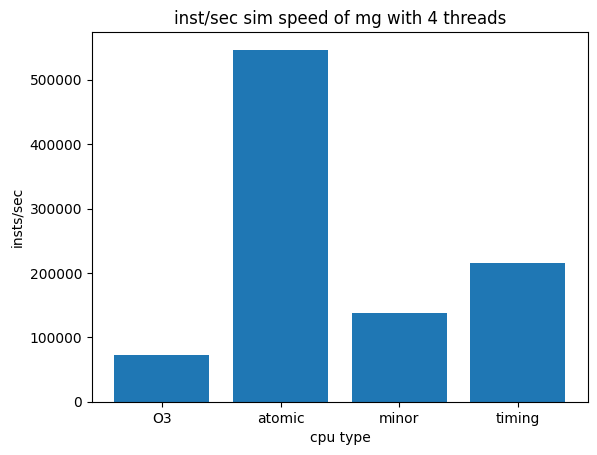

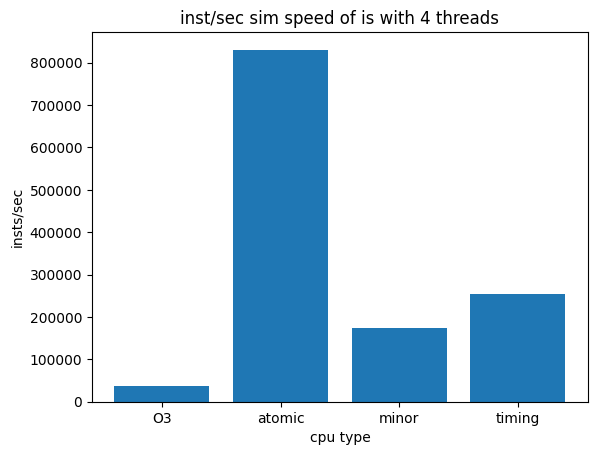

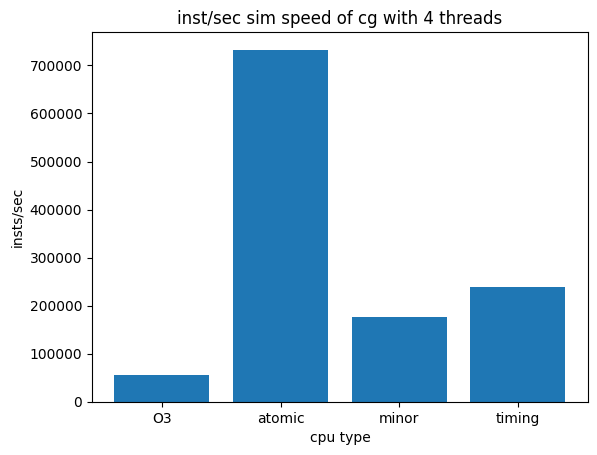

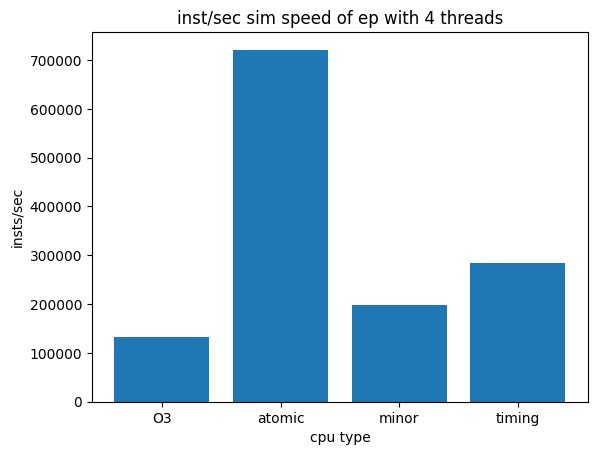

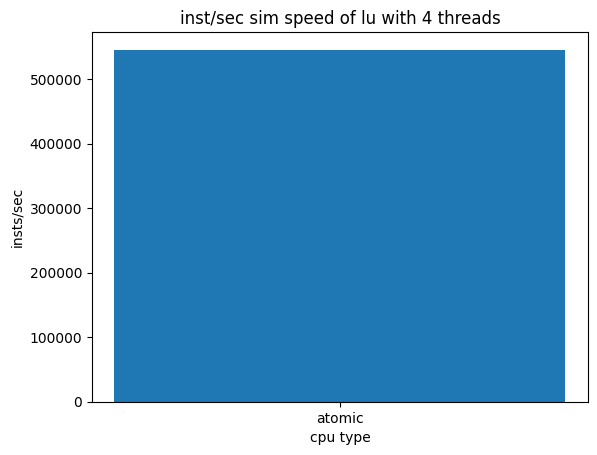

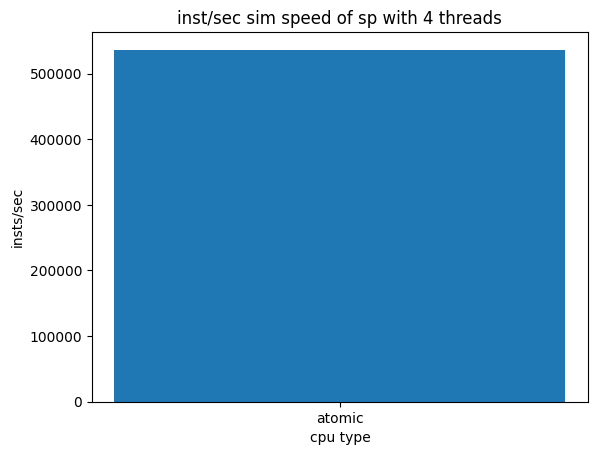

In [23]:
average_speedup = {
    "timing":0,
    "minor":0
}
for thread_num, thread_data in graphs.items():
    for bench, bench_data in thread_data.items():
        fig, ax = plt.subplots()
        time_list = bench_data["time"]
        sim_insts_list = bench_data["sim_insts"]
        inst_per_sec_list = [float(insts/time) for insts, time in zip(sim_insts_list,time_list)]

        ax.bar(bench_data["cpu_type"],inst_per_sec_list)

        ax.set_title(f"inst/sec sim speed of {bench} with {thread_num} threads")

        ax.set_ylabel("insts/sec")
        ax.set_xlabel("cpu type")

        plt.show()


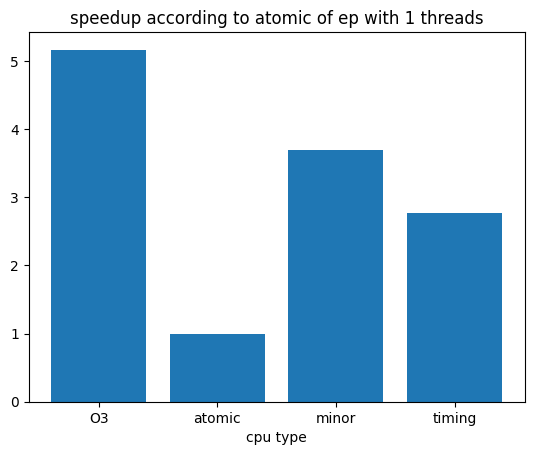

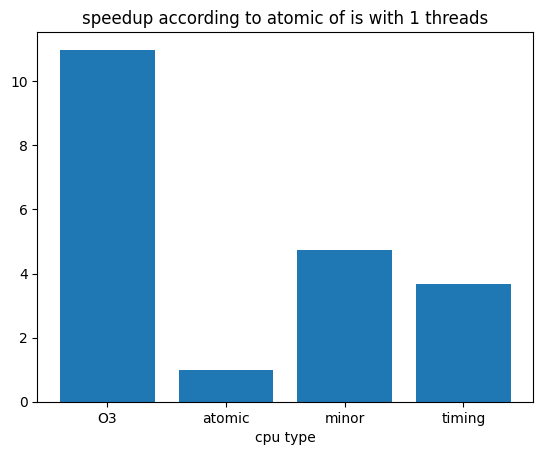

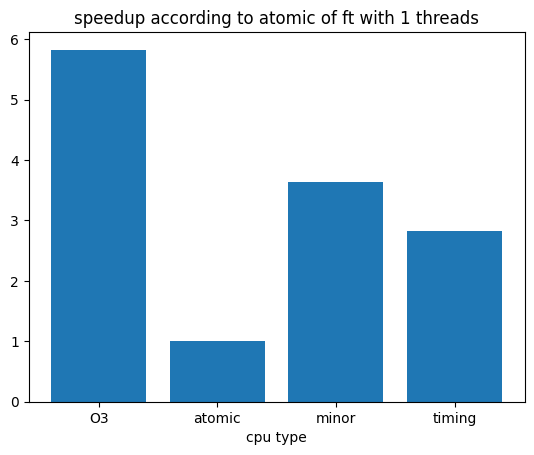

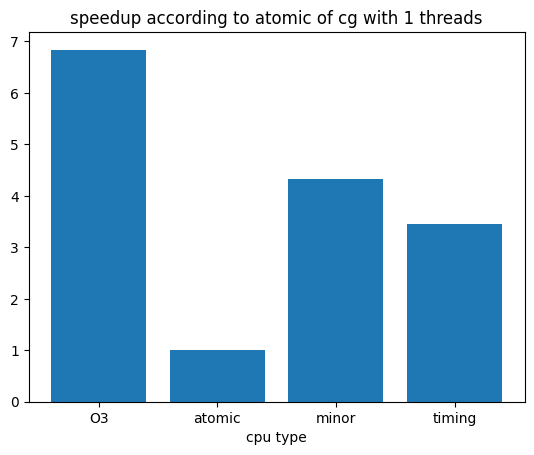

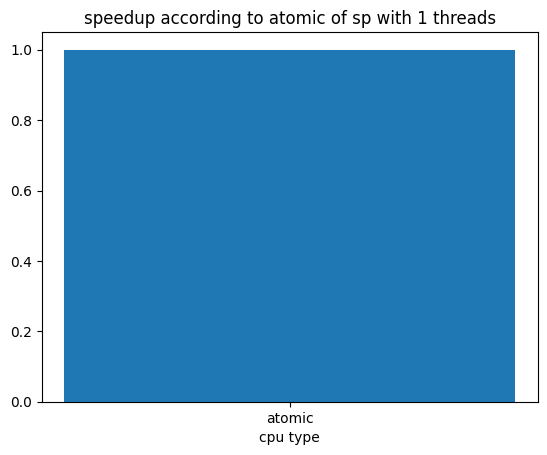

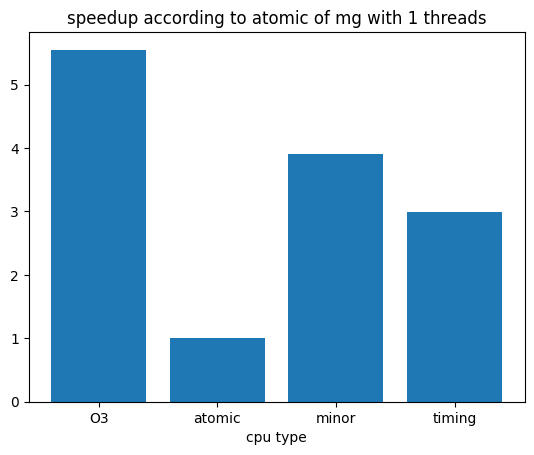

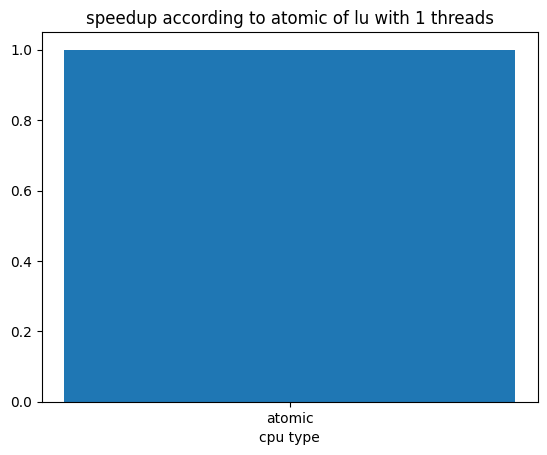

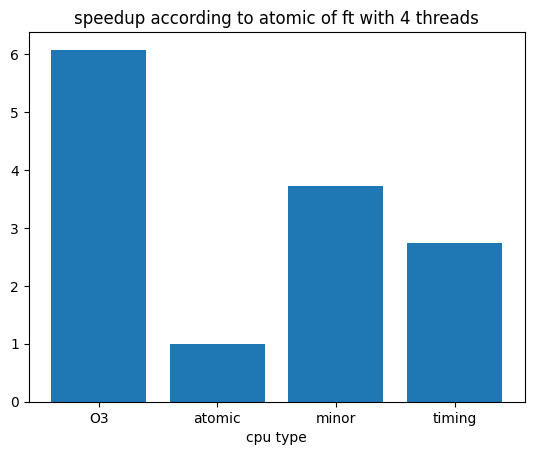

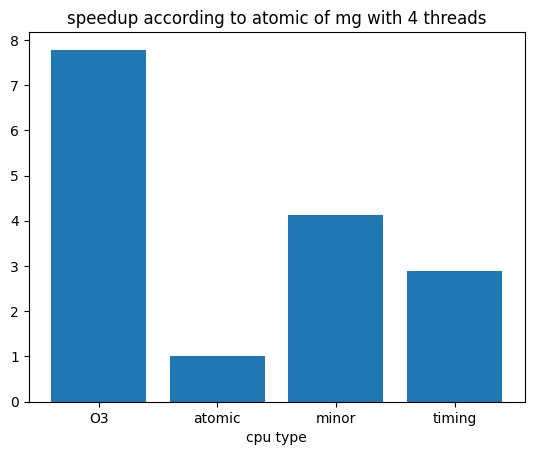

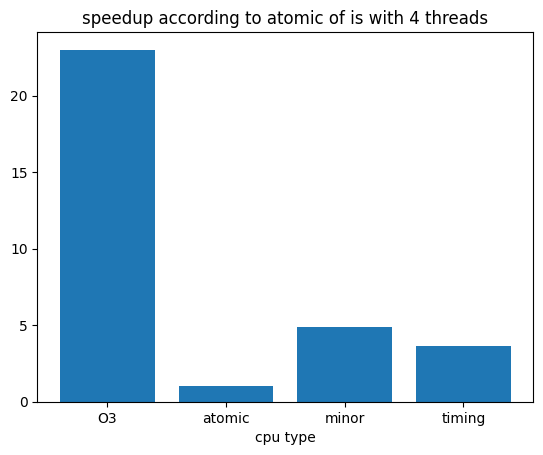

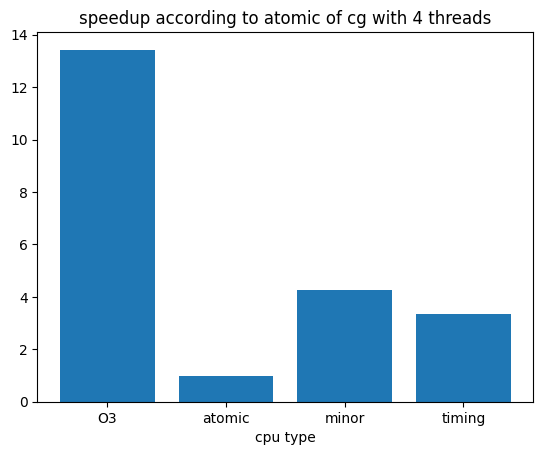

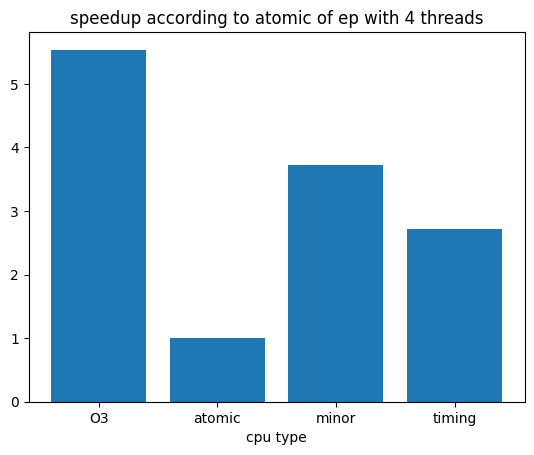

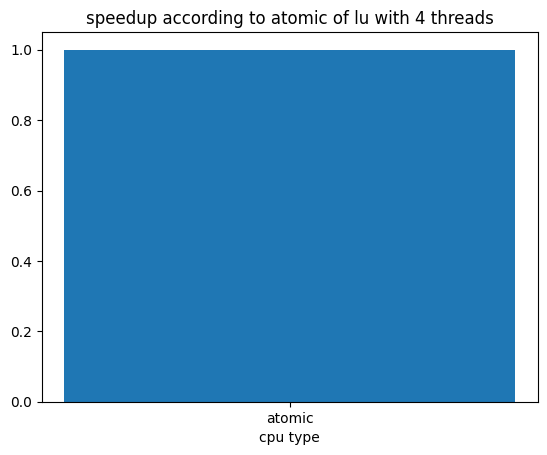

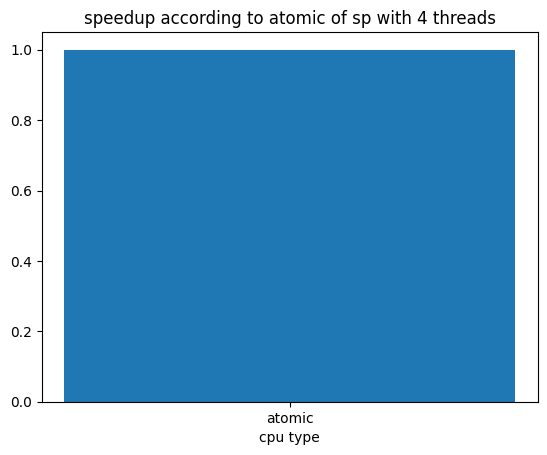

4.101458519912887


In [25]:
for thread_num, thread_data in graphs.items():
    for bench, bench_data in thread_data.items():
        fig, ax = plt.subplots()
        time_list = bench_data["time"]
        cpu_type_list = bench_data["cpu_type"]
        atomic_time = time_list[cpu_type_list.index("atomic")]
        speedup_list = [time/atomic_time for time in time_list]
        ax.bar(cpu_type_list,speedup_list)

        ax.set_title(f"speedup according to atomic of {bench} with {thread_num} threads")

        # ax.set_ylabel("")
        ax.set_xlabel("cpu type")

        plt.show()


In [30]:
total_minor = 0
minor_counter = 0
total_timing = 0
timing_counter = 0
total_o3 = 0
o3_counter = 0
for thread_num, thread_data in graphs.items():
    for bench, bench_data in thread_data.items():
        time_list = bench_data["time"]
        cpu_type_list = bench_data["cpu_type"]
        atomic_time = time_list[cpu_type_list.index("atomic")]
        speedup_list = [time/atomic_time for time in time_list]
        if "minor" in cpu_type_list:
            minor_counter += 1
            total_minor += speedup_list[cpu_type_list.index("minor")]
        if "timing" in cpu_type_list:
            timing_counter += 1
            total_timing += speedup_list[cpu_type_list.index("timing")]
        if "O3" in cpu_type_list:
            o3_counter += 1
            total_o3 += speedup_list[cpu_type_list.index("O3")]

average_minor = total_minor/minor_counter
print(f"minor average speedup: {average_minor}")
average_timing = total_timing/timing_counter
print(f"timing average speedup: {average_timing}")
average_o3 = total_o3/o3_counter
print(f"o3 average speedup: {average_o3}")

minor average speedup: 4.101458519912887
timing average speedup: 3.0987317133599306
o3 average speedup: 9.017906601376179
